/home/kalpesh/projects/lp5/dl/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-05 18:18:30.867308: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7183 - loss: 0.7913 - val_accuracy: 0.8577 - val_loss: 0.3977
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8624 - loss: 0.3821 - val_accuracy: 0.8830 - val_loss: 0.3354
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8828 - loss: 0.3236 - val_accuracy: 0.8879 - val_loss: 0.3194
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8977 - loss: 0.2859 - val_accuracy: 0.8967 - val_loss: 0.2867
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9031 - loss: 0.2577 - val_accuracy: 0.9032 - val_loss: 0.2721
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9148 - loss: 0.2392 - val_accuracy: 0.9034 - val_loss: 0.2777
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9180 - loss: 0.2221 - val_accuracy: 0.9107 - val_loss: 0.2545
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9263 - loss: 0.1971 - val_accur

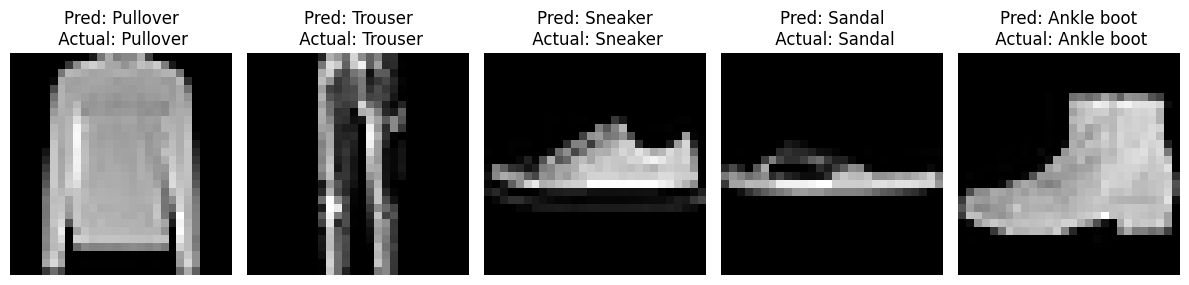

In [2]:

import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the CSV datasets
train_df = pd.read_csv('datasets/fashion-mnist_train.csv')
test_df = pd.read_csv('datasets/fashion-mnist_test.csv')

# Assuming the first column is 'label' and the rest are pixel values
train_x = train_df.drop(columns='label').values
train_y = train_df['label'].values
test_x = test_df.drop(columns='label').values
test_y = test_df['label'].values

# Reshape the data to (num_samples, 28, 28, 1) assuming each image is 28x28
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
train_x, test_x = train_x / 255.0, test_x / 255.0

# One-hot encode the labels 
train_y_cat = to_categorical(train_y, 10)
test_y_cat = to_categorical(test_y, 10)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_x, train_y_cat, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_x, test_y_cat)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Predict classes
pred_probs = model.predict(test_x)
pred_labels = np.argmax(pred_probs, axis=1)

# Define the label names for Fashion MNIST (or modify this according to your dataset)
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert numeric predictions to label names
pred_label_names = [label_names[label] for label in pred_labels]

# Classification report
print("\nClassification Report:")
print(classification_report(test_y, pred_labels))

# Show 5 random test image predictions
random_indices = random.sample(range(len(test_x)), 5)
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_x[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_label_names[idx]}\n Actual: {label_names[test_y[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()